Estimated tidal radius: 12.74 pc
Tidal radius estimates saved to 'tidal_radius_estimates.txt'


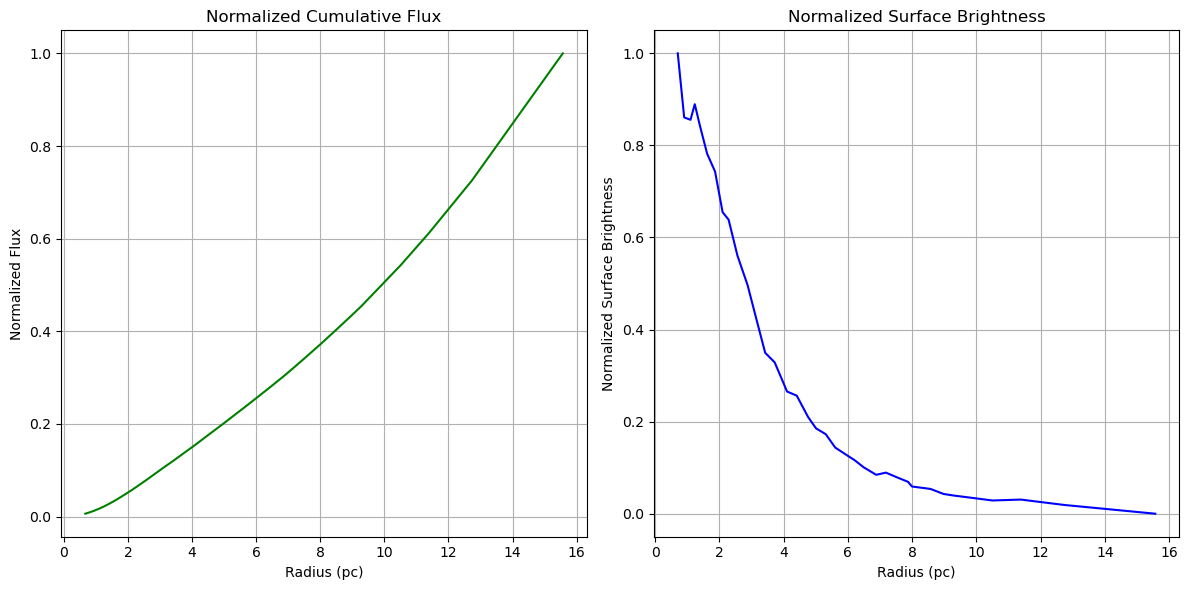

Surface brightness profile saved to MASS-GC-Data_correct-fv1.csv

First few rows of output data:
   radius_pc  sb_normalized
1   0.703925       1.000000
2   0.904004       0.860792
3   1.100581       0.855677
4   1.233525       0.889507
5   1.399602       0.841176


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('MASS-GC-Data.xlsx')

# Cluster distance in parsecs (adjust this to ones actual cluster distance)
distance_pc = 6800  # For NGC 6266

# Convert arcminutes to radians then to parsecs
df['radius_pc_corrected'] = distance_pc * np.tan(np.radians(df['radius(arcmin)'] / 60))

# Calculate differential flux (flux in each annular bin)
df['diff_flux'] = df['Flux'].diff()
df['radius_diff'] = df['radius_pc_corrected'].diff()

 # Calculate area of each annulus (2πrΔr)
df['annulus_area'] = 2 * np.pi * df['radius_pc_corrected'] * df['radius_diff']

# Calculate surface brightness (diff_flux per unit area)
df['surface_brightness'] = df['diff_flux'] / df['annulus_area']

# Add this code after your surface brightness calculation
# Estimate tidal radius from the surface brightness profile

# First, let's handle any NaN values that might be present
df_clean = df.dropna(subset=['surface_brightness', 'radius_pc_corrected'])

# Estimate background level (typically the minimum value in your profile)
background_level = df_clean['surface_brightness'].min()

# Find where profile consistently stays near background (within 10% of background)
# We'll look for the point where the brightness is close to background and remains so
tidal_radius_candidate = None
for i in range(1, len(df_clean)):
    current_radius = df_clean['radius_pc_corrected'].iloc[i]
    current_brightness = df_clean['surface_brightness'].iloc[i]
    
    # Check if brightness is close to background level
    if current_brightness < 1.1 * background_level:
        tidal_radius_candidate = current_radius
        break

if tidal_radius_candidate is not None:
    print(f"Estimated tidal radius: {tidal_radius_candidate:.2f} pc")
else:
    print("Could not determine tidal radius from the data - profile may not extend to background levels")

# For a more robust estimate, let's also find the radius where brightness drops to 10% of maximum
max_brightness = df_clean['surface_brightness'].max()
radius_at_10_percent = None

for i in range(1, len(df_clean)):
    current_radius = df_clean['radius_pc_corrected'].iloc[i]
    current_brightness = df_clean['surface_brightness'].iloc[i]
    
    if current_brightness < 0.1 * max_brightness:
        radius_at_10_percent = current_radius
        break

if radius_at_10_percent is not None:
    print(f"Radius where surface brightness drops to 10% of maximum: {radius_at_10_percent:.2f} pc")

# Save these estimates to a text file
with open('tidal_radius_estimates.txt', 'w') as f:
    f.write("Tidal Radius Estimates for NGC 6266\n")
    f.write("===================================\n\n")
    f.write(f"Background level: {background_level:.6e}\n")
    if tidal_radius_candidate is not None:
        f.write(f"Estimated tidal radius (near background): {tidal_radius_candidate:.2f} pc\n")
    if radius_at_10_percent is not None:
        f.write(f"Radius at 10% of max brightness: {radius_at_10_percent:.2f} pc\n")
    f.write(f"Maximum surface brightness: {max_brightness:.6e}\n")
    f.write(f"Number of data points: {len(df_clean)}\n")

print("Tidal radius estimates saved to 'tidal_radius_estimates.txt'")

# Normalize surface brightness to [0,1] range
sb_min = df['surface_brightness'].min()
sb_max = df['surface_brightness'].max()
df['sb_normalized'] = (df['surface_brightness'] - sb_min) / (sb_max - sb_min)

# Plot both versions for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df['radius_pc_corrected'], df['Flux']/df['Flux'].max(), 'g-')  # Simple normalized flux
plt.title('Normalized Cumulative Flux')
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Flux')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['radius_pc_corrected'][1:], df['sb_normalized'][1:], 'b-')  # Skip first NaN
plt.title('Normalized Surface Brightness')
plt.xlabel('Radius (pc)')
plt.ylabel('Normalized Surface Brightness')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the surface brightness profile
output_df = pd.DataFrame({
    'radius_pc': df['radius_pc_corrected'][1:],  # Skip first row with NaN
    'sb_normalized': df['sb_normalized'][1:]
})

output_file = 'MASS-GC-Data_correct-fv1.csv'
output_df.to_csv(output_file, index=False, header=False)
print(f"Surface brightness profile saved to {output_file}")

# Display the first few rows of the output
print("\nFirst few rows of output data:")
print(output_df.head())